# Práctica 1 - PREDICCIÓN DE LA PRODUCCIÓN DE ENERGÍA EÓLICA

### Aprendizaje Automático


Jaime Ballesteros Calvo - **100454114**

Nicolás Lamotte Fresno - **100454275**

---

## Importación Datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

## Análisis Exploratorio de Datos Simplificado

A continuación, vamos a explorar y visualizar los datos que vamos a utilizar para la realización de la práctica.

### Conjunto de Datos

In [6]:
wind_ava

,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
4744,2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
4745,2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727
4746,2009-12-31 12:00:00,516.96,2.393873e+06,2.386499e+06,2.379125e+06,2.371752e+06,2.364378e+06,2.390276e+06,2.382632e+06,2.374982e+06,...,1.988424,2.123630,2.258837,2.394043,2.529749,1.960983,2.094194,2.226906,2.360117,2.492829


### Variable _datetime_

Inicialmente, es necesario abordar la columna datatime de manera distinta, ya que la vamos a tratar como un **índice**. Esta estrategia facilitará la manipulación de los datos durante la práctica

In [7]:
wind_ava = wind_ava.set_index('datetime')

In [8]:
wind_ava.index = pd.to_datetime(wind_ava.index)

In [9]:
wind_ava

,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,p54.162.9,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,2.505940e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,2.508339e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,2.504882e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,2.505904e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,2.501015e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,2.381615e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,2.381552e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,2.374648e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727


In [1]:
# MOVEEERRRRR wind_ava.plot(figsize=(15, 5))

Con esto, podemos observar los diferentes datos que están presentes en el conjunto de datos que utilizaremos. Estos incluyen **22 variables meteorológicas**, las cuales están organizadas en una cuadrícula de 5x5 que representa 25 localizaciones. Sin embargo, para esta práctica, solo utilizaremos los datos correspondientes a la **localización 13**.

### Selección de las Variables de Interés

A continuación, eliminamos las variables que no corresponden a la localización 13.

In [10]:
for c in wind_ava.columns:
    if not c.endswith('.13') and c != 'energy':
        wind_ava.drop(c, axis = 1, inplace=True)

In [12]:
wind_ava

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


### Naturaleza de las variables y tipo de problema

Tras esto, podemos abordar varias preguntas planteadas en el enunciado. Las variables que utilizaremos son de tipo **numérico** y contamos con un total de **4748 instancias** en nuestros datos. 

Asimismo, al observar la naturaleza del objetivo final de esta práctica, que consiste en predecir ciertos valores de la variable "energía", se evidencia que se trata de un **problema de regresión**.

### Análisis Variable Objetivo

<Axes: xlabel='datetime'>

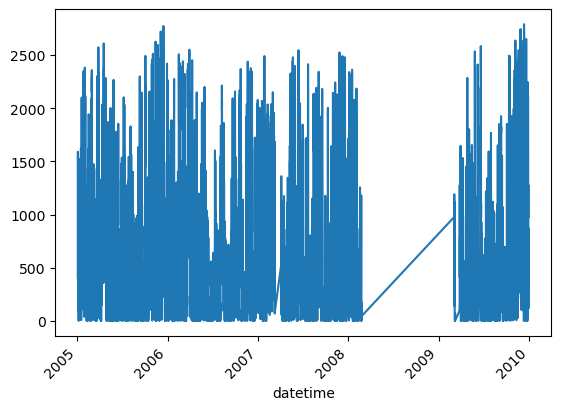

In [11]:
wind_ava['energy'].plot(rot=45)

A primera vista, podemos observar un salto temporal entre 2008 y 2009. A continuación, procederemos a identificar de manera precisa todos los saltos temporales.

In [14]:
instances_per_day = wind_ava.resample('D').size()
time_diff = wind_ava.index.to_series().diff().dt.days
missing_days = time_diff[time_diff > 1]

In [16]:
missing_days

datetime
2006-01-23 12:00:00      3.0
2007-04-04 18:00:00     24.0
2007-09-28 18:00:00      3.0
2007-12-31 12:00:00      2.0
2008-02-12 00:00:00      2.0
2009-03-05 12:00:00    373.0
2009-03-26 18:00:00     17.0
2009-06-19 12:00:00      8.0
2009-08-17 18:00:00      2.0
2009-09-27 00:00:00      2.0
2009-09-29 12:00:00      2.0
Name: datetime, dtype: float64

Tras esto, se observará que los datos abarcan hasta el 26 de febrero de 2008, y luego hay un intervalo sin registros hasta el 5 de marzo de 2009 (lo cual implica un paréntesis de 373 días antes del 5 de marzo de 2009). Aunque existen otros períodos de inactividad donde no hay datos, ninguno es tan significativo como el mencionado anteriormente.

### Valores Faltantes

In [17]:
wind_ava.isna()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 00:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 06:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 12:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-12-30 12:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-12-30 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
wind_ava.isna().sum()

energy        0
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64

Con esto se puede observar que no hay **ninguna variable faltante**. Esto significa que en los días en que se han recopilado datos, se capturan todas las variables correctamente, sin que ninguna contenga valores NaN. 

Por lo tanto, en esta etapa no eliminamos ninguna columna.

### Variables constantes

In [21]:
wind_ava.std()

energy        6.655316e+02
p54.162.13    4.482599e+04
p55.162.13    6.552216e+00
cape.13       1.217590e+02
p59.162.13    1.466953e+06
lai_lv.13     3.973773e-01
lai_hv.13     1.164342e-01
u10n.13       3.100583e+00
v10n.13       3.016766e+00
sp.13         7.136897e+02
stl1.13       6.414325e+00
u10.13        3.158104e+00
v10.13        3.058615e+00
t2m.13        6.163483e+00
stl2.13       5.547947e+00
stl3.13       4.582827e+00
iews.13       3.670135e-01
inss.13       3.790142e-01
stl4.13       3.552873e+00
fsr.13        7.602132e-03
flsr.13       9.435944e-02
u100.13       4.841730e+00
v100.13       4.667552e+00
dtype: float64

Como **ninguna variable es constante**, no se elimina ninguna variable

### Correlación de variables

In [19]:
datos_a_evaluar = wind_ava.drop(columns=['energy'])

In [20]:
datos_a_evaluar

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,281.680110,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,282.842686,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,282.027412,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


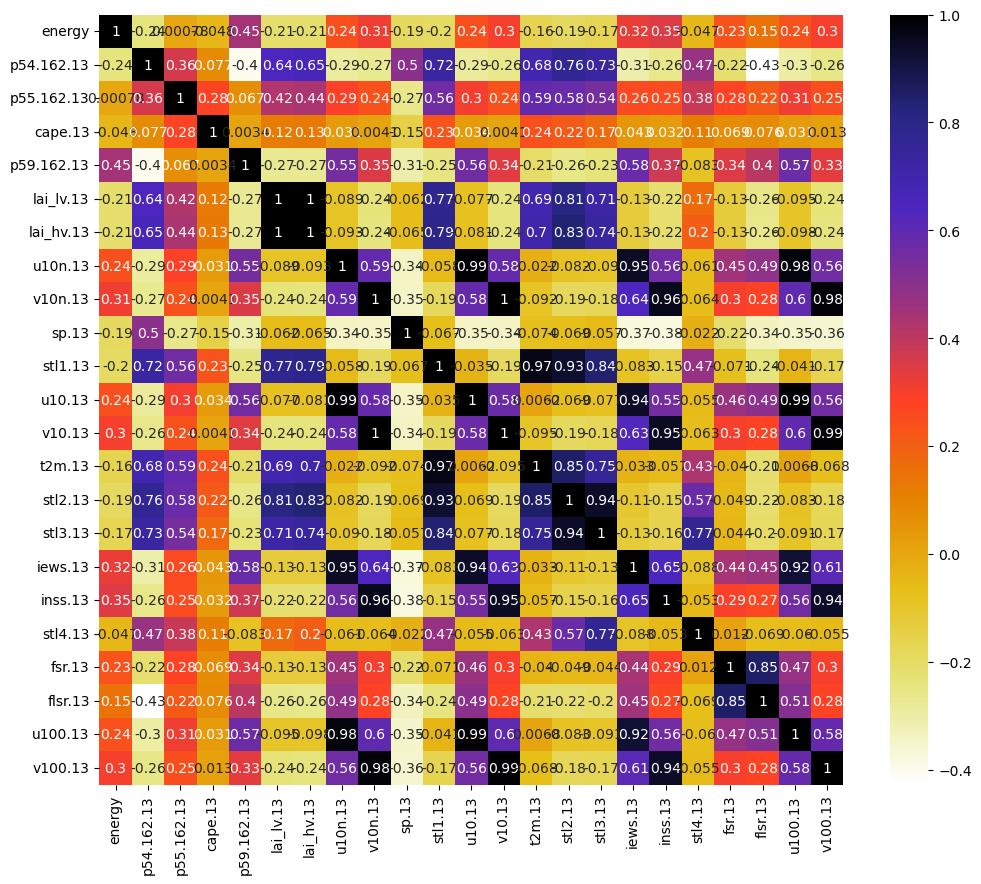

In [18]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = datos_a_evaluar.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Con esto, se puede observar que existe una correlación exacta entre lai_lv.13 y lai_hv.13, así como entre v10n.13 y v10.13, y también hay correlaciones muy cercanas a 1 en muchos casos.

Inicialmente, consideramos la posibilidad de eliminar una variable altamente correlacionada con otra cuando la correlación superaba 0.95. Sin embargo, debido a las mejoras que hemos realizado en nuestro modelo de manera **iterativa, decidimos no eliminar variables debido a la correlación**.

### Variables con valores atípicos

Ahora vamos a realizar el estudio de la media, Q1, Q2 y Q3. En estos primeros casos, no hay valores atípicos, ya que no hay valores fuera de los cuartiles

Hay algunos plot que se harán de manera individual y otros en un subplot, dependiendo de como se visualizan estos según sus ejes 

In [22]:
datos_filtrados = wind_ava

<AxesSubplot:>

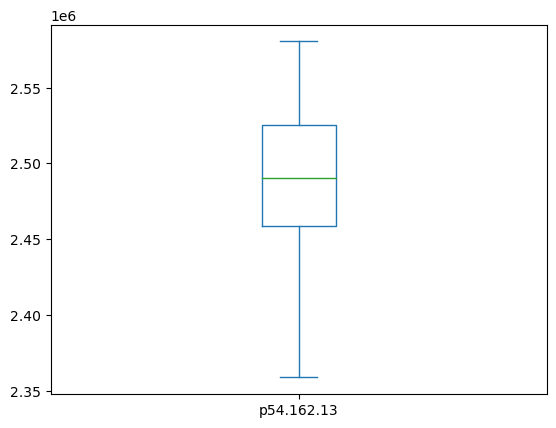

In [23]:
datos_filtrados['p54.162.13'].plot.box()

<AxesSubplot:>

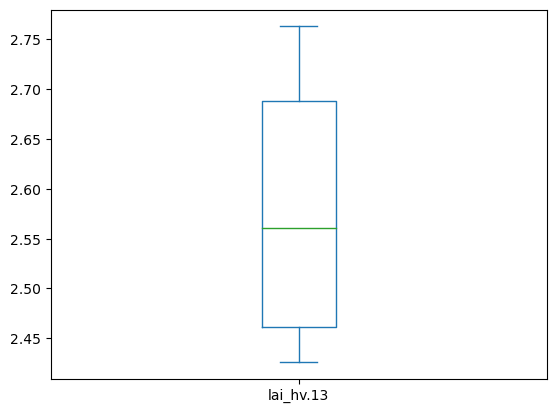

In [24]:
datos_filtrados['lai_hv.13'].plot.box()

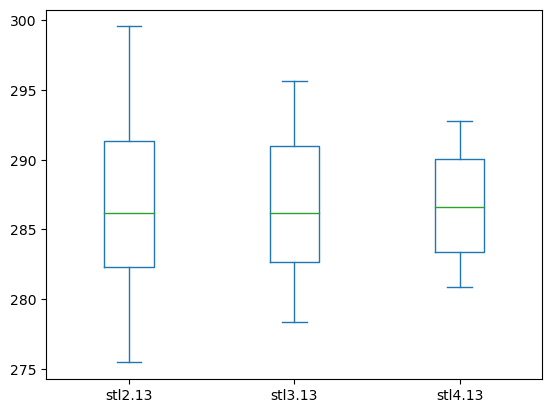

In [25]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar los diagramas de caja para las tres series en el mismo subgráfico
datos_filtrados[['stl2.13', 'stl3.13', 'stl4.13']].plot.box(ax=ax)

# Mostrar el gráfico
plt.show()

Ahora vamos a analizar el resto de variables de variables 

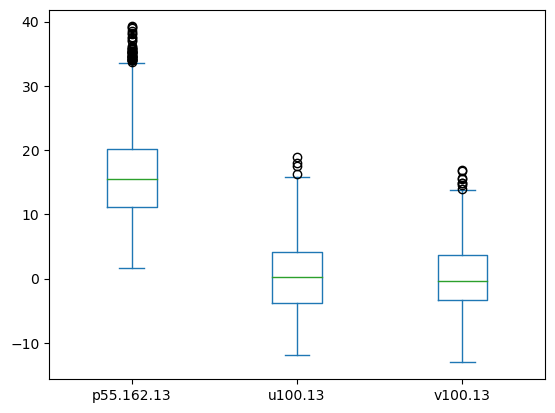

In [26]:
# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar los diagramas de caja para las tres series en el mismo subgráfico
datos_filtrados[['p55.162.13', 'u100.13', 'v100.13']].plot.box(ax=ax)

# Mostrar el gráfico
plt.show()

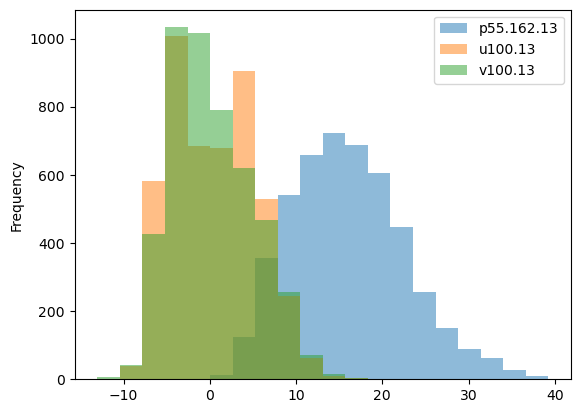

In [27]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar histogramas para las tres series en el mismo subgráfico
datos_filtrados[['p55.162.13', 'u100.13', 'v100.13']].plot.hist(alpha=0.5, bins=20, ax=ax)

# Mostrar el gráfico
plt.show()

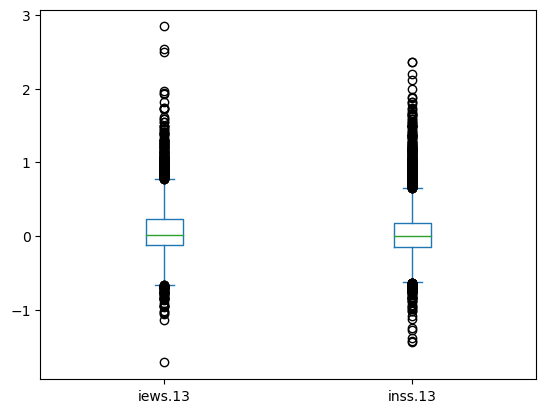

In [28]:
# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar los diagramas de caja para las tres series en el mismo subgráfico
datos_filtrados[['iews.13', 'inss.13']].plot.box(ax=ax)

# Mostrar el gráfico
plt.show()

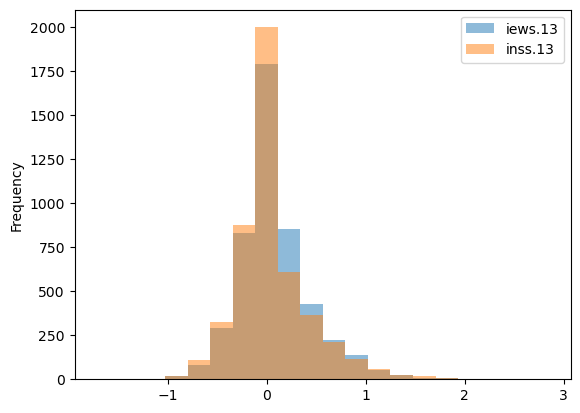

In [29]:
# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar histogramas para las tres series en el mismo subgráfico
datos_filtrados[['iews.13', 'inss.13']].plot.hist(alpha=0.5, bins=20, ax=ax)

# Mostrar el gráfico
plt.show()

<AxesSubplot:>

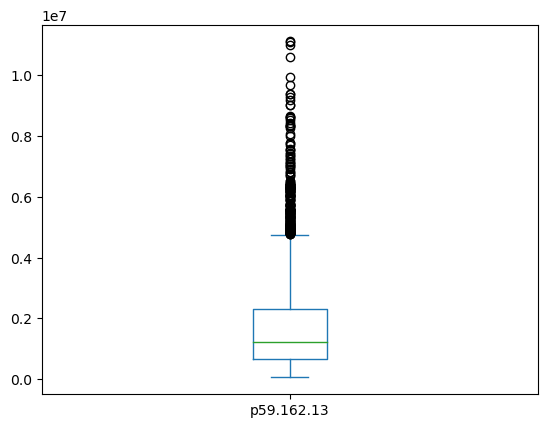

In [30]:
datos_filtrados['p59.162.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

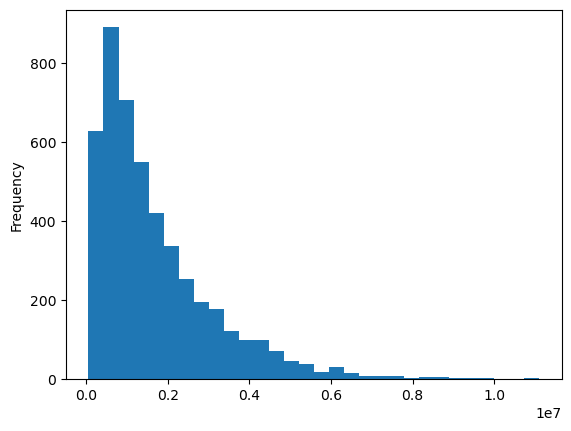

In [31]:
datos_filtrados['p59.162.13'].plot.hist(bins = 30)

<AxesSubplot:>

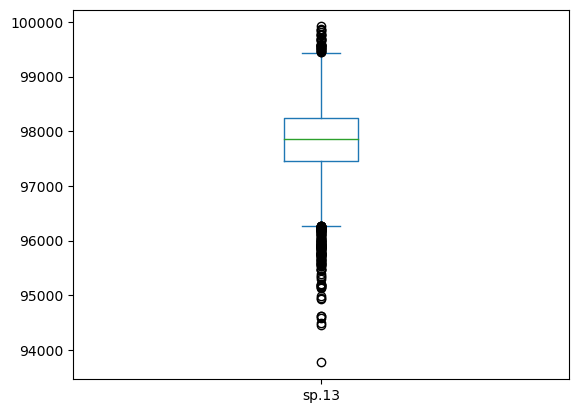

In [32]:
datos_filtrados['sp.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

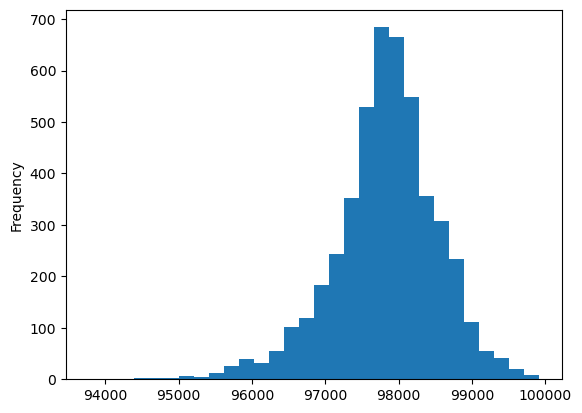

In [33]:
datos_filtrados['sp.13'].plot.hist(bins = 30)

<AxesSubplot:>

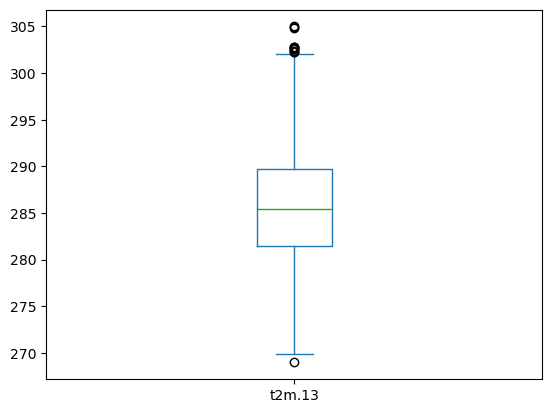

In [34]:
datos_filtrados['t2m.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

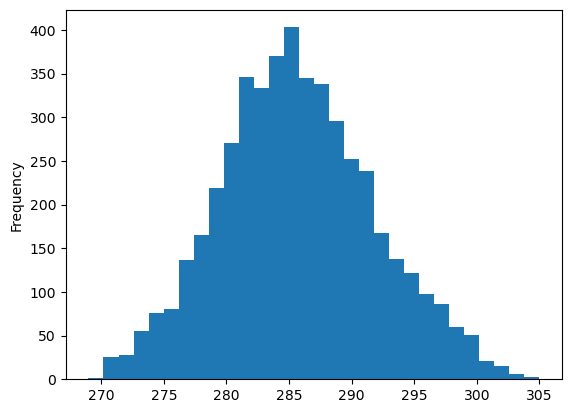

In [35]:
datos_filtrados['t2m.13'].plot.hist(bins = 30)

<AxesSubplot:>

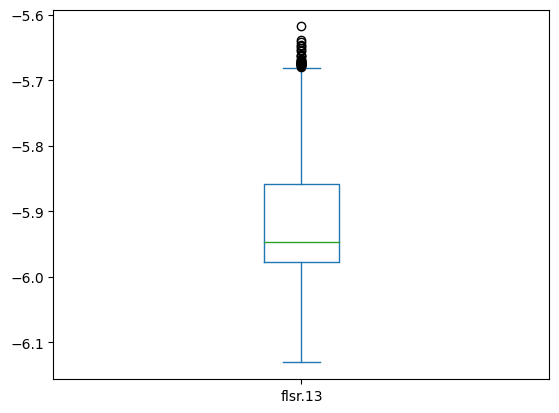

In [36]:
datos_filtrados['flsr.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

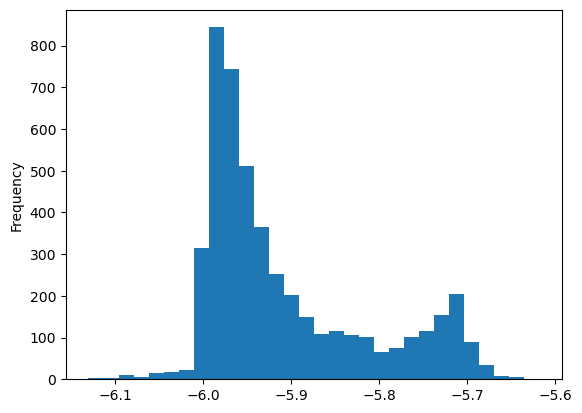

In [37]:
datos_filtrados['flsr.13'].plot.hist(bins = 30)

<AxesSubplot:>

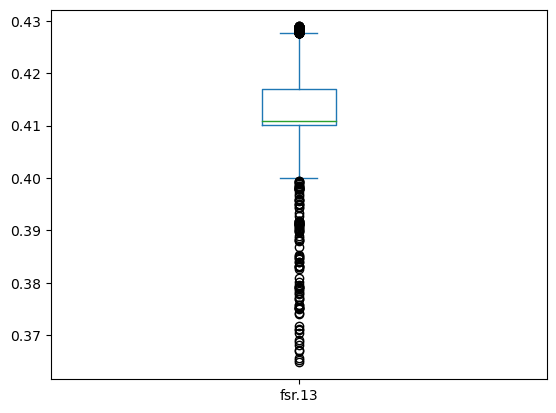

In [41]:
datos_filtrados['fsr.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

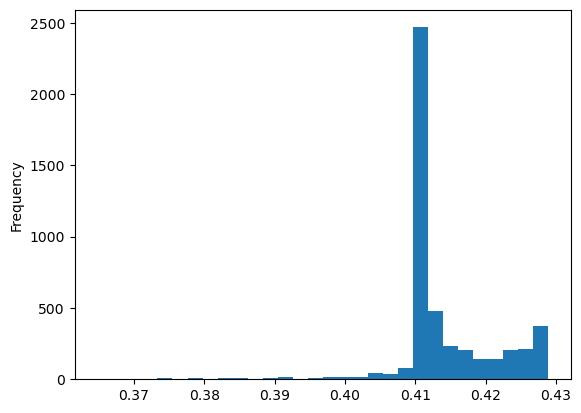

In [42]:
datos_filtrados['fsr.13'].plot.hist(bins = 30)

<AxesSubplot:>

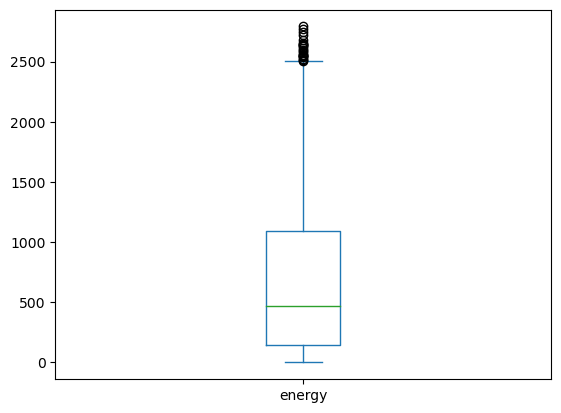

In [43]:
datos_filtrados['energy'].plot.box()

<AxesSubplot:ylabel='Frequency'>

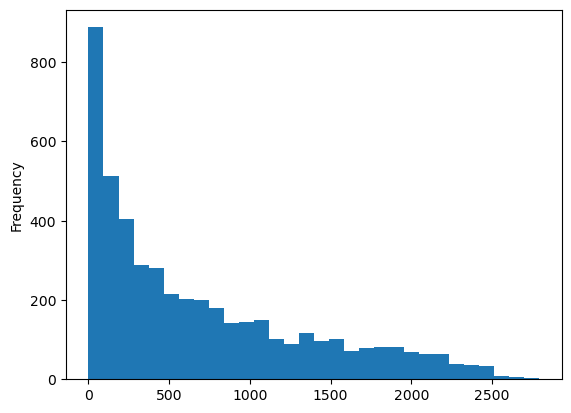

In [44]:
datos_filtrados['energy'].plot.hist(bins = 30)

Tras todas estas gráficas, se observa que aunque haya valores fuera de los Q1 y Q3, se puede observar que estos valores son significativos ya que siguen una distribución (exponencial, normal, etc; dependiendo de la variable)

Viendo estos datos, si que hay una variable que pensamos que es mejor modificarla, la cual es cape.13. Esta variable es una medida de la cantidad de energía disponible en la atmósfera para alimentar el desarrollo vertical de tormentas convectivas, lo que indica la capacidad de la atmósfera para producir movimientos ascendentes de aire que pueden llevar a la formación de tormentas. Debido a ello, sus valores pueden ser 0, que no va a haber tormentas, u otro valor; por lo que la consideramos una variable relevante

<Axes: >

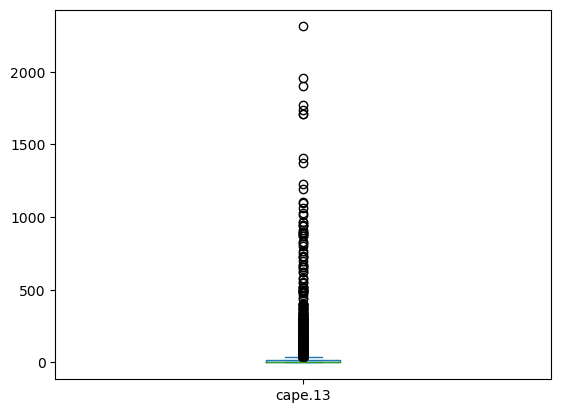

In [46]:
datos_filtrados['cape.13'].plot.box()

<Axes: ylabel='Frequency'>

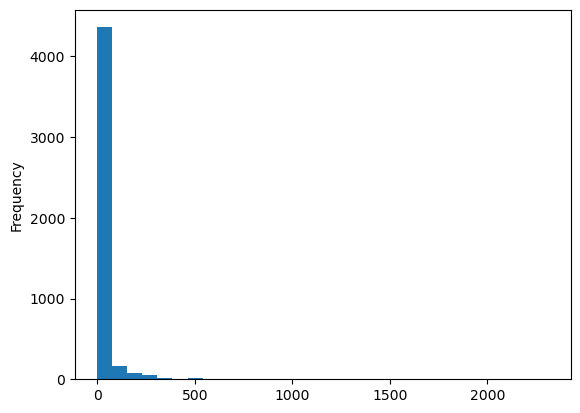

In [47]:
datos_filtrados['cape.13'].plot.hist(bins = 30)

Como se puede observar, si se pone en logaritmo y se mueve el 0, se observa pueden observar cuantos datos hay de una mejor manera

<Axes: ylabel='Frequency'>

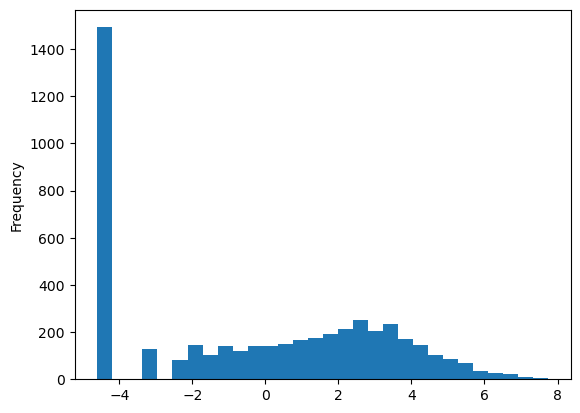

In [48]:
np.log(datos_filtrados['cape.13']+10e-3).plot.hist(bins = 30)

Como se ha visto, la variable es relevante, por lo que no podemos eliminarla, si no que vamos  a transformarla. Para ello, a los valores distintos de 0, se les asigna 1, haciendo que la variable cape.13 solo tenga dos valores, 0 o 1

In [49]:
datos_filtrados['cape.13'] = datos_filtrados['cape.13'].apply(lambda x: 1 if x != 0 else 0)

In [50]:
datos_filtrados['cape.13']

datetime
2005-01-02 18:00:00    1
2005-01-03 00:00:00    1
2005-01-03 06:00:00    1
2005-01-03 12:00:00    0
2005-01-03 18:00:00    0
                      ..
2009-12-30 06:00:00    1
2009-12-30 12:00:00    1
2009-12-30 18:00:00    1
2009-12-31 12:00:00    1
2009-12-31 18:00:00    1
Name: cape.13, Length: 4748, dtype: int64

<Axes: >

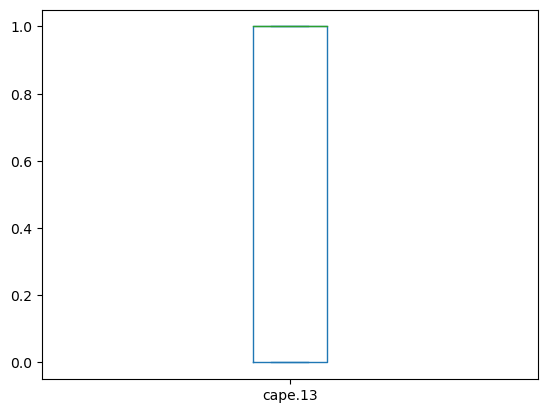

In [51]:
datos_filtrados['cape.13'].plot.box()

### ANALISIS INFORMACIÓN VARIABLES

Dentro de la lista de features proprocionados, aquellos que podrían tener menos sentido de cara a utilizarlos en el entrenamiento podrían ser aquellos que no están directamente relacionados con la generación de energía eólica en el parque de Sotavento o que tienen una relación indirecta y débil con la misma. 

Después de analizarlos y de mejorar nuestro modelo de forma iterativa, hemos decidido eliminar las siguientes variables:
- **lai_hv** y **lai_lv**: Estos atributos representan el índice de área foliar para vegetación alta y baja respectivamente. Aunque la vegetación puede afectar el viento y, por lo tanto, potencialmente la generación de energía eólica, su influencia es indirecta y difícil de modelar con precisión.


- **stl3** y  **stl4**: La temperatura del suelo puede influir en la atmósfera y, por lo tanto, en las condiciones de viento. Sin embargo, la relación entre la temperatura del suelo y la generación de energía eólica puede ser compleja y depender de múltiples factores, lo que dificulta su incorporación al modelo.


- **fsr**: La rugosidad de la superficie puede afectar la velocidad y la dirección del viento, lo que a su vez puede influir en la generación de energía eólica pero es difícil medir su impacto en la generación de energía eólica.


- **p54.13**, **p59.162** y **p55.162**: Estos atributos representan integrales verticales de diferentes variables meteorológicas. Su relación directa con la generación de energía eólica en el parque de Sotavento no es clara y directa.

In [45]:
wind_ava.drop(columns=['lai_hv.13'], inplace=True)
wind_ava.drop(columns=['lai_lv.13'], inplace=True)

wind_ava.drop(columns=['stl3.13'], inplace=True)
wind_ava.drop(columns=['stl4.13'], inplace=True)

wind_ava.drop(columns=['fsr.13'], inplace=True)

wind_ava.drop(columns=['p54.162.13'], inplace=True)
wind_ava.drop(columns=['p59.162.13'], inplace=True)
wind_ava.drop(columns=['p55.162.13'], inplace=True)


In [46]:
wind_ava

,energy,cape.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,iews.13,inss.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,13.527577,-0.757587,-1.922799,99846.319914,280.960661,-0.906454,-2.709511,280.473098,281.042026,-0.057958,-0.138650,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,6.896412,-1.412620,-1.403011,99917.733093,279.296651,-1.653843,-1.641837,278.286616,280.747406,-0.103576,-0.083050,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,4.774439,-2.290185,-0.754580,99764.378681,278.233956,-2.580356,-0.793682,277.206490,280.114863,-0.165721,-0.036241,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,0.000000,-3.497855,1.271028,99672.670459,280.787263,-3.365262,1.227559,280.926600,279.991138,-0.275550,0.098192,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,0.000000,-0.971249,0.553060,99372.811211,279.583112,-2.242707,1.320793,277.363875,280.576898,-0.056553,0.041844,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,24.971074,4.595786,5.563189,95460.434452,281.680110,4.645265,5.621756,280.731326,282.643490,0.628948,0.879581,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,60.248874,4.894838,5.577096,95663.765406,282.842686,4.876985,5.562963,283.310687,282.370909,0.740926,0.699769,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,3.145067,0.958361,0.948029,95653.110509,282.027412,1.302978,1.425508,281.060085,282.425812,0.109802,0.125174,-5.866856,3.033799,3.568993


### Creación de Datos

#### _Energy_yesterday_

Al ser una regresión temporal, hemos añadido a cada instancia, el **valor de la energía de la instancia anterior**.

Al haber saltos temporales, hemos decidido eliminar las instancias en las que hay un salto temporal significativo previo (Ver Análisis Variable Objetivo)



In [47]:
wind_ava = wind_ava.drop(pd.Timestamp('2007-04-04 18:00:00'))
wind_ava = wind_ava.drop(pd.Timestamp('2009-03-05 12:00:00'))
wind_ava = wind_ava.drop(pd.Timestamp('2009-03-26 18:00:00'))
wind_ava = wind_ava.drop(pd.Timestamp('2009-06-19 12:00:00'))

# Calcula la energía de ayer
energy_yesterday = wind_ava['energy'].shift(1)

# Añade las nuevas columnas al DataFrame
wind_ava['energy_yesterday'] = energy_yesterday

# Eliminamos también la primera instancia, puesto que no tiene instancia anterior.
wind_ava = wind_ava.iloc[1:]

## Conjunto Final de Datos

In [50]:
wind_ava

,energy,cape.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,iews.13,inss.13,flsr.13,u100.13,v100.13,energy_yesterday
datetime,,,,,,,,,,,,,,,,
2005-01-03 00:00:00,696.80,6.896412,-1.412620,-1.403011,99917.733093,279.296651,-1.653843,-1.641837,278.286616,280.747406,-0.103576,-0.083050,-5.913881,-3.743344,-3.129469,402.71
2005-01-03 06:00:00,1591.15,4.774439,-2.290185,-0.754580,99764.378681,278.233956,-2.580356,-0.793682,277.206490,280.114863,-0.165721,-0.036241,-5.908272,-5.097203,-1.157748,696.80
2005-01-03 12:00:00,1338.62,0.000000,-3.497855,1.271028,99672.670459,280.787263,-3.365262,1.227559,280.926600,279.991138,-0.275550,0.098192,-5.961995,-4.500835,1.502478,1591.15
2005-01-03 18:00:00,562.50,0.000000,-0.971249,0.553060,99372.811211,279.583112,-2.242707,1.320793,277.363875,280.576898,-0.056553,0.041844,-5.987860,-3.392324,2.131114,1338.62
2005-01-04 00:00:00,232.30,0.000000,-0.153568,1.554043,99257.763690,276.620140,-0.243661,2.381510,274.850965,279.654761,0.003361,0.144389,-5.957546,0.190590,5.349629,562.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,24.971074,4.595786,5.563189,95460.434452,281.680110,4.645265,5.621756,280.731326,282.643490,0.628948,0.879581,-5.715421,6.922743,9.179816,968.28
2009-12-30 12:00:00,855.00,60.248874,4.894838,5.577096,95663.765406,282.842686,4.876985,5.562963,283.310687,282.370909,0.740926,0.699769,-5.732455,7.434887,7.537381,1280.13
2009-12-30 18:00:00,117.06,3.145067,0.958361,0.948029,95653.110509,282.027412,1.302978,1.425508,281.060085,282.425812,0.109802,0.125174,-5.866856,3.033799,3.568993,855.00


Tras toda la limpieza, se puede concluir que nuestro conjunto de datos filtrado contiene:
- 1 variable objetivo
- 15 features
- 4743 instancias

## Ahora vamos a definir lo del outer y el inner

Para ello,lo primero que vamos a realizar es dividir nuestros datos en los que vamos a utilizar como train y otros como test. En nuestro caso, anteriormente se ha visto que hay un parón de datos entre el 25-2-2008 y el 5-3-2009, por lo que utilizaremos los datos hasta esta primera fecha como train, y los datos del 5-3-2009 en adelante como test. De esta manera, el apartado de train está compuesto por 3827 intancias, mientras que el apartado de test por 921, representando un 80/20 en cuanto al reparto. 

In [54]:
X = datos_filtrados.drop(columns=['energy'])
y = datos_filtrados['energy']

In [55]:
X_train = X.loc[:'2009-03-03']
y_train = y.loc[:'2009-03-03']

X_test = X.loc['2009-03-04':]
y_test = y.loc['2009-03-04':]

In [56]:
X_train

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_hv.13,sp.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,1,1.386937e+06,2.432983,99846.319914,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,1,1.153526e+06,2.432838,99917.733093,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,1,1.098754e+06,2.432704,99764.378681,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0,1.076021e+06,2.432514,99672.670459,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0,1.070830e+06,2.432369,99372.811211,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-02-24 00:00:00,2.466893e+06,19.370060,0,1.227631e+06,2.453854,97914.485585,284.041069,283.471287,282.240806,0.033773,0.081090,282.709850,0.410712,-5.929224,2.533687,3.353960
2008-02-24 06:00:00,2.458941e+06,20.859243,1,1.104303e+06,2.454267,97834.193324,282.631601,283.084260,282.284231,0.003857,0.019154,282.707725,0.414566,-5.879858,1.326827,1.044971
2008-02-24 12:00:00,2.461805e+06,21.490690,1,6.612880e+05,2.454614,97965.730567,284.997036,283.030517,282.315762,-0.062917,0.035643,282.705021,0.424874,-5.689764,-2.036895,0.715686


In [57]:
X_test

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_hv.13,sp.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,
2009-03-05 12:00:00,2.411255e+06,10.505421,1,9.666385e+06,2.468591,96892.122835,280.950499,280.073879,280.970975,0.912900,-1.280752,281.491062,0.416409,-5.881434,7.184308,-10.838239
2009-03-05 18:00:00,2.424548e+06,13.821869,1,9.366030e+06,2.468937,97197.309532,280.260920,280.720728,280.959635,0.611511,-0.674134,281.488937,0.416948,-5.864654,6.562830,-7.670114
2009-03-06 00:00:00,2.439200e+06,17.508242,1,7.408533e+06,2.469339,97346.858624,279.769530,280.538234,280.956592,0.199549,-0.167948,281.485846,0.425721,-5.725873,4.395505,-3.332029
2009-03-06 06:00:00,2.449285e+06,21.188517,1,5.469472e+06,2.469697,97408.251126,280.604835,280.368499,280.944976,0.203268,-0.128020,281.482948,0.428183,-5.689463,4.967808,-2.258858
2009-03-06 12:00:00,2.465311e+06,22.895861,1,4.140428e+06,2.470043,97643.166240,283.342747,280.544034,280.934465,0.549779,-0.523689,281.480437,0.428149,-5.704852,6.703552,-5.073250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,2.385772e+06,14.413342,1,3.905586e+06,2.434994,95460.434452,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,2.385708e+06,12.802883,1,2.745694e+06,2.434849,95663.765406,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,2.379049e+06,10.915997,1,2.254171e+06,2.434715,95653.110509,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


In [58]:
y_train

datetime
2005-01-02 18:00:00     402.71
2005-01-03 00:00:00     696.80
2005-01-03 06:00:00    1591.15
2005-01-03 12:00:00    1338.62
2005-01-03 18:00:00     562.50
                        ...   
2008-02-24 00:00:00      64.34
2008-02-24 06:00:00      14.95
2008-02-24 12:00:00     171.21
2008-02-25 06:00:00       2.35
2008-02-25 18:00:00      46.62
Name: energy, Length: 3827, dtype: float64

In [59]:
y_test

datetime
2009-03-05 12:00:00     977.91
2009-03-05 18:00:00    1191.99
2009-03-06 00:00:00     795.88
2009-03-06 06:00:00     141.05
2009-03-06 12:00:00    1124.20
                        ...   
2009-12-30 06:00:00    1280.13
2009-12-30 12:00:00     855.00
2009-12-30 18:00:00     117.06
2009-12-31 12:00:00     516.96
2009-12-31 18:00:00     867.07
Name: energy, Length: 921, dtype: float64